# Lab #1. Numpy, Pandas and Matplotlib

### Important: do not delete any blocks
#### But you may add as many as you need.

This aim of this lab is to get you aquainted to very important python modules (libraries):
- numpy
- pandas
- matplotlib

Make sure to install these modules before you start.

#### About tasks

This notebook consists of numerous tasks but please make it look like a whole story: a report with your own code, thoughts and conclusions. In some of these tasks you will have to implement some custom functions, in some of them you will be asked to present some plots and describe them. Please try to make your code as short as possible and your answers as clear as possible.



#### Evaluation

- Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url. 
- There are **Questions** in the tasks, don't skip them. If you skip a question, value of the task becomes 0. 
- When your answer includes some numbers, make sure to provide some code or calculations that prove your results.
- Pay a lot attention to your plots:
    - Are they comprehensible? Shapes, colours, sizes?
    - Are they titled?
    - Are axes labelled?
    - Is legend included?

#### How to submit
- Name your file according to this convention: `2022_lab01_GroupNumber_Surname_Name.ipynb`, for example 
    - `2022_lab01_404_Sheipak_Sviat.ipynb`
    - `2022_lab01_NoGroup_Sheipak_Sviat.ipynb`
- Attach your .ipynb to an email with topic `2022_lab01_GroupNumber_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is `2022-09-29 23:00:00 +03:00`

#### The Data:
- All the datasets you need are here: https://disk.yandex.ru/d/FnMXcdDjbWTxTw

## Part 1. Numpy and plots [2.5 points]

`numpy` is a module that helps you to deal with vectors (matrices and tensors too) and it has a lot of cool features.

Firstly, let's import it:

In [1]:
import numpy as np

Vectors in numpy are called **arrays**. Create an array from a list:

In [2]:
my_list = [1, 2, 3, 4, 5, 6]
my_vector = np.array(my_list)
print(my_list)
print(my_vector)

[1, 2, 3, 4, 5, 6]
[1 2 3 4 5 6]


You can reshape them:

In [3]:
my_vector = my_vector.reshape((2, 3))
print(my_vector.shape)
print(my_vector)

my_vector = my_vector.reshape((6, 1))
print(my_vector.shape)
print(my_vector)

(2, 3)
[[1 2 3]
 [4 5 6]]
(6, 1)
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


You don't even have to state all of dimensions explicitly, since they can be derived (use -1):

In [4]:
my_vector = my_vector.reshape((3, -1))
print(my_vector.shape)
print(my_vector)

(3, 2)
[[1 2]
 [3 4]
 [5 6]]


Slices!

In [5]:
print(my_vector[0, 1])
print(my_vector[:, 1])
print(my_vector[:2])
print(my_vector[:2,::-1])

2
[2 4 6]
[[1 2]
 [3 4]]
[[2 1]
 [4 3]]


Arithmetic operations:

In [6]:
vector_a = np.arange(10)
print(vector_a)
print(vector_a - 10)
print(vector_a * 100)
print(np.array([5, 4]) + np.array([1, 6]))
print(np.array([5, 4]) * np.array([1, 6]))

[0 1 2 3 4 5 6 7 8 9]
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1]
[  0 100 200 300 400 500 600 700 800 900]
[ 6 10]
[ 5 24]


**Task 1. Basic arrays [0.5 point]** 

Create a 2-dimensional numpy array `x` of 100 by 2 shape filled with random numbers from $U[0, 1]$

In [7]:
x = np.random.uniform(size=(100,2))# MY CODE HERE

assert x.shape == (100, 2), "Wrong shape"
assert x.min() >= 0 and x.max() <= 1, "Wrong range"
assert np.abs(x.mean() - 0.5) < 8e-2, "Wrong distribution or bad luck"
x.mean()

0.5190020310839286

Calculate averages: row-wise, column-wise and total. Use `np.mean` and `axis` parameter. Then `print` the `mean_total` rounded to 3 digits after comma (using `format` method).

In [8]:
mean_by_row = np.mean(x, axis=1)# MY CODE HERE
mean_by_col = np.mean(x, axis=0)# MY CODE HERE
mean_total = np.mean(x)# MY CODE HERE

assert mean_by_row.shape == (100, )
assert mean_by_col.shape == (2, )
assert mean_total.shape == ()

print("The total mean is {:.3f}".format(mean_total))

The total mean is 0.519


**Task 2. Sort 2-dim array [0.5 point]** 

Create a 1-dimensional numpy array `y` of 100 random **integers** from $U\{0, 1, 2, 3\}$

In [9]:
y = np.random.randint(0, 4, size=100)# MY CODE HERE

assert y.shape == (100,)

Import class `Counter` from `collections` module.

In [10]:
from collections import Counter

In [11]:
basic_counter = Counter(y)
container_A = dict(basic_counter)
container_B = list(basic_counter.items())
container_C = np.array(container_B)

In [12]:
print(container_A, container_B, container_C)

{2: 24, 0: 37, 1: 20, 3: 19} [(2, 24), (0, 37), (1, 20), (3, 19)] [[ 2 24]
 [ 0 37]
 [ 1 20]
 [ 3 19]]


Here are three data structures.

**Question:** What is the type of `container_A`? What is the type of `container_B`? What is the type of the elements of `container_C`?

**Your answer:** `container_A` is a dictionary(python class 'dict'), `container_B` is a list(python class 'list') and `container_C` is a numpy array ('numpy.ndarray' type) in which every element is also a numpy array containing integers. Code block below as a proof:

In [13]:
print(type(container_A), type(container_B), type(container_C), type(container_C[0]), type(container_C[0][0]))# MY CODE HERE

<class 'dict'> <class 'list'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.int32'>


Use `np.sort` to order elements of `container_C` acsending by their first coordinate (pay attention to `axis` parameter).

In [14]:
reworked_container_C = container_C.view('int32, int32')# MY CODE HERE
counter_values = np.sort(reworked_container_C, axis=0).view('int32')# MY CODE HERE

assert list(counter_values[:, 0]) == [0, 1, 2, 3], "Error: Wrong order"
assert min([container_A[x[0]] == x[1] for x in counter_values]), "Error: Count values shuffled"
print("Great!")

Great!


**Task 3. Basic barplot [0.5 points]**

Plot a barplot representing how many times each value `0, 1, 2, 3` is encounterd in `y`. Do not forget to:
- Add title to the plot
- Label the axes
- Specify x-ticks

You may use `counter_values` you have obtained in a Task 2.

In [15]:
import matplotlib.pyplot as plt

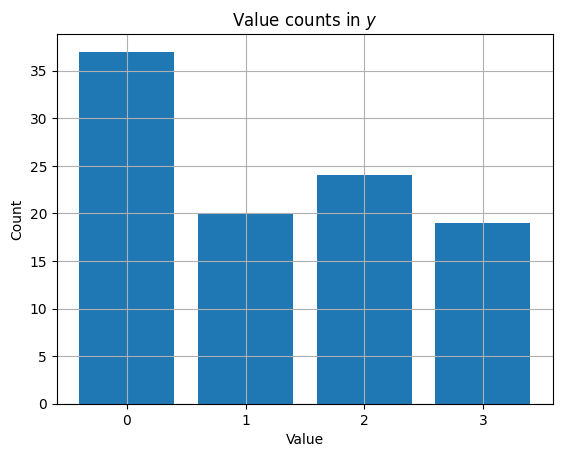

In [16]:
plt.title("Value counts in $y$")
plt.bar(x=counter_values[:,0],height=counter_values[:,1] )# MY CODE HERE
plt.xticks(counter_values[:, 0])
plt.xlabel("Value")
plt.ylabel("Count")
plt.grid(10)
plt.show()

**Task 4. Concat two numpy arrays [0.5 point]**

You have:
- `x`: 100 $\times$ 2
- `y`: 100

Concatenate them horizontally to get `z`: 100 $\times$ 3

In [17]:
z = np.column_stack((x,y))# MY CODE HERE
assert z.shape == (100, 3) and np.equal(z[:, :2], x).all() and np.equal(z[:, -1], y).all()

**Task 5. Basic Scatter Plot [0.5 point]**

You have:
- `z`: 100 $\times$ 3

Each row of `z` consists of 3 numbers. Build a scatter plot where each row is represented by a dot: first and second number are coordinates and third number corresponds to dot colour. Don't forget to add a legend.

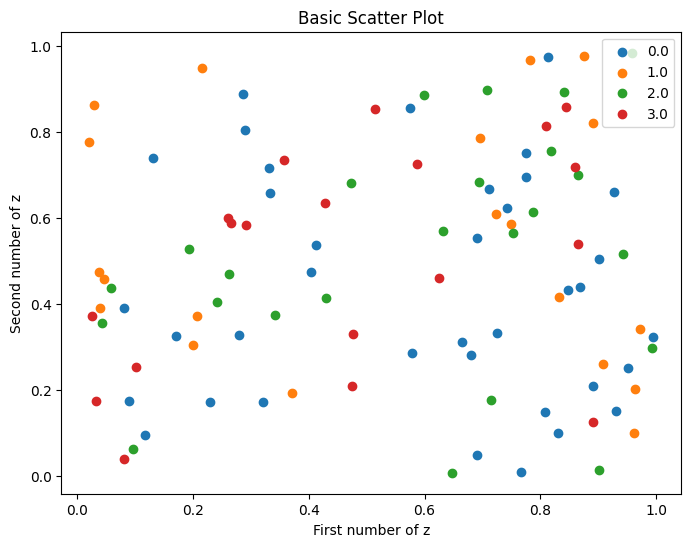

In [18]:
plt.figure(figsize=(8, 6))
plt.title("Basic Scatter Plot")
for color in np.unique(z[:,2]):
    tmp_arr = [[x_c,y_c] for x_c,y_c,c_c in z if c_c==color]
    tmp_arr = np.array(tmp_arr)
    plt.scatter(x=tmp_arr[:,0], y=tmp_arr[:,1], label=color)# MY CODE HERE
plt.xlabel('First number of z')# MY CODE HERE
plt.ylabel('Second number of z')# MY CODE HERE

plt.legend(loc="upper right")
plt.show()

# Part 2. Moscow houses [4.5 points]

In this part we start to work with datasets and `pandas` module.
You will need to download `moscow_coords.csv` file. It provides a coordinate and an address for some houses in Moscow. The original source of the data: https://data.mos.ru/opendata/60562/data/table?versionNumber=3&releaseNumber=445

In [19]:
import pandas as pd

In [20]:
coords_db = pd.read_csv("data/moscow_coords.csv")

In [21]:
coords_db.head(10)

,ADDRESS,coor_x,coor_y
0,"город Москва, Варшавское шоссе, дом 150, строе...",37.601252,55.599249
1,"город Москва, Косинская улица, дом 26А",37.828115,55.717493
2,"город Москва, Гороховский переулок, дом 21",37.668093,55.766224
3,"город Москва, Тагильская улица, дом 4, строени...",37.752887,55.818257
4,"город Москва, Ленинградский проспект, дом 73А,...",37.513546,55.803510
5,"город Москва, улица Вострухина, дом 5А",37.797659,55.720022
6,"город Москва, улица Космонавта Волкова, дом 10...",37.514713,55.815373
7,"город Москва, Балтийская улица, дом 8, строени...",37.517288,55.809580
8,"город Москва, улица Головачёва, дом 3, корпус 2",37.805437,55.675219
9,"город Москва, Климентовский переулок, дом 1, с...",37.631972,55.740967


In [22]:
print(type(coords_db))
print(coords_db.shape)
print(coords_db.columns)
print(type(coords_db["ADDRESS"]))

<class 'pandas.core.frame.DataFrame'>
(406934, 3)
Index(['ADDRESS', 'coor_x', 'coor_y'], dtype='object')
<class 'pandas.core.series.Series'>


**Task 1. Address analysis [0.5 point]**

As we can see, the dataset has 3 columns: `ADDRESS`, `coor_x` and `coor_y`.
Let's focus on `ADDRESS` - the datatype of this column is `str`.

Your task is to find and describe addresses that inlcude word `город`* at least two times.

**город* - *city* in russian

Let's do it step by step:
1. Implement a function `tokenize_address`, that takes a string

* casts string to lowercase;
    
* removes all `,` and `.` symbols;
    
* splits string into a `list` of strings; separation symbol is a whitespace ` `.
    
2. Implement a function `count_a_token`, that takes a list of strings and counts number of entries of a particular token.

In [23]:
def tokenize_address(input_string):
    """
    input:
    - input_string: str
    output:
    - list<str> - string split into tokens
    """
    tmp_trans = input_string.maketrans({',': None, '.': None})# MY CODE HERE

    return input_string.lower().translate(tmp_trans).split()# MY CODE HERE

assert tokenize_address("A, b. C, and d?") == ["a", "b", "c", "and", "d?"], "Something is wrong"

In [24]:
def count_a_token(token_list, lookup_token):
    """
    input:
    - token_list: list<str>
    - lookup_token: str
    output:
    - int - how many times lookup_token is encountered in token_list
    """
    # MY CODE HERE
    counter = 0
    for token in token_list:
        if token==lookup_token:
            counter+=1
    return counter

In [25]:
test_address = "город Москва, улица Космонавта Волкова, дом 10."
tokens = tokenize_address(test_address)
print(tokens)
print(count_a_token(tokens, "город"))

assert tokens == ["город", "москва", "улица", "космонавта", "волкова", "дом", "10"]
assert count_a_token(tokens, "город") == 1
print("Seems fine!")

['город', 'москва', 'улица', 'космонавта', 'волкова', 'дом', '10']
1
Seems fine!


Now it is time add new column `city_token_cnt` to the dataset. Values in this column should be a result of applying two functions above to a `coords_db["ADDRESS"]`. Note that `coords_db["ADDRESS"]` is a `pandas.Series` object and it has method `apply`.

In [26]:
coords_db.loc[:, "city_token_cnt"] = coords_db["ADDRESS"].apply(lambda x: count_a_token(tokenize_address(x), "город"))

In [27]:
coords_db.head()

,ADDRESS,coor_x,coor_y,city_token_cnt
0,"город Москва, Варшавское шоссе, дом 150, строе...",37.601252,55.599249,1
1,"город Москва, Косинская улица, дом 26А",37.828115,55.717493,1
2,"город Москва, Гороховский переулок, дом 21",37.668093,55.766224,1
3,"город Москва, Тагильская улица, дом 4, строени...",37.752887,55.818257,1
4,"город Москва, Ленинградский проспект, дом 73А,...",37.513546,55.803510,1


And the final step: let's do a `groupby` by column `city_token_cnt` to find out how many addresses have token `город` two times or more.

In [28]:
stats = coords_db.groupby('city_token_cnt')# MY CODE HERE

In [29]:
stats.count()

,ADDRESS,coor_x,coor_y
city_token_cnt,,,
0,1790,1790,1790
1,394061,394061,394061
2,11083,11083,11083


**Question**: how many addresses have token `город` two times or more?

**Your answer**: 11083, as You can see in the table above.

**Task 2. Count 2-grams [1 point]**

For a sequence of tokens `["a_1", "a_2", ..., "a_N"]` **n-gram** is a subsequence of **n** consecutive tokens.

For example: given a sequence of tokens `["a", "b", "c", "d"]` it has:
- Four unigrams: `["a"], ["b"], ["c"], ["d"]`
- Three 2-grams: `["a", "b"], ["b", "c"], ["c", "d"]`
- Two 3-grams: `["a", "b", "c"], ["b", "c", "d"]`
- One 4-gram: `["a", "b", "c", "d"]`

Your task is two find all 2-grams that start with `город` token and count their occurences in all addresses.

Firstly, implement a function `get_n_grams`:

In [30]:
def get_n_grams(input_tokens, n):
    """
    input:
    - input_tokens: list<str>
    - n: int, size of n-grams
    output:
    - list<list<str>> - list of n-grams
    """
    # MY CODE BELOW
    result = []
    for i in range(len(input_tokens)-n+1):
        tmp_list = input_tokens[i:i+n]
        result.append(tmp_list)
    return result

In [31]:
assert get_n_grams(["a", "b", "c", "d"], 1) ==  [['a'], ['b'], ['c'], ['d']]
assert get_n_grams(["a", "b", "c", "d"], 2) ==  [['a', 'b'], ['b', 'c'], ['c', 'd']]
assert get_n_grams(["a", "b", "c", "d"], 3) ==  [['a', 'b', 'c'], ['b', 'c', 'd']]
assert get_n_grams(["a", "b", "c", "d"], 4) ==  [['a', 'b', 'c', 'd']]

print("OK, seems fine!")

OK, seems fine!


Secondly, define a function that will filter list of n-grams by the first element of an n-gram:

In [32]:
def filter_n_grams(n_grams, lookup_token):
    """
    input:
    - n_grams: list<list<str>>
    - lookup_token: str
    output:
    - list<list<str>> - sublist of n-grams first token of which is equal to lookup_token
    """
    # MY CODE BELOW
    result = []
    for i in range(len(n_grams)):
        if n_grams[i][0] == lookup_token:
            result.append(n_grams[i])
    return result

In [33]:
assert filter_n_grams([
    ["a", "b"], 
    ["a", "c"],
    ["b", "d"],
    ["d", "a"]
    ], 
    "a") == [["a", "b"], ["a", "c"]] 

print("Seems fine!")

Seems fine!


Back to our dataset. Leave rows with `city_token_cnt >= 2`

In [34]:
sub_db = coords_db[coords_db['city_token_cnt']>=2]# MY CODE HERE
print(sub_db.shape)
sub_db.head(5)

(11083, 4)


,ADDRESS,coor_x,coor_y,city_token_cnt
40,"город Москва, город Зеленоград, корпус 1212",37.193861,55.992106,2
193,"город Москва, город Зеленоград, корпус 1459",37.162394,55.984514,2
220,"город Москва, город Зеленоград, корпус 1215",37.190049,55.994432,2
282,"город Москва, город Зеленоград, корпус 1110",37.188728,55.999289,2
363,"город Москва, город Зеленоград, корпус 115",37.204655,56.008116,2


Let's build a dict that contains counts of 2-grams: 
```
{
    "город x": cnt_x,
    "город y": cnt_y,
     ...
    "город N": cnt_N
      
}
```
Note that key is a string `"город x"`, not a list `["город", "x"]` - list cannot be a key in a dict.

In [35]:
counter_dict = {}
for address in sub_db["ADDRESS"]:
    tokens = tokenize_address(address)# MY CODE HERE
    n_grams = get_n_grams(tokens, 2)# MY CODE HERE
    filtered_n_grams = filter_n_grams(n_grams, 'город')# MY CODE HERE
    for x in filtered_n_grams:
        key = x[0]+' '+x[1]# MY CODE HERE
        counter_dict[key] = 1 if key not in counter_dict else counter_dict[key] + 1

In [36]:
counter_dict

{'город москва': 11083,
 'город зеленоград': 3579,
 'город московский': 1351,
 'город троицк': 4193,
 'город щербинка': 1959,
 'город зеленогра': 1}

**Task 3. Garden Ring houses scatterplot [1 points]**

We need to find houses that are located near the Garden Ring. There can be a lot of definitions of *near* - but in our case *near* means inside a polygon. Inner and outer polygon points can be found in files: `inner_poly.csv` and `outer_poly.csv` respectively.

In [37]:
inner_poly = pd.read_csv("data/inner_poly.csv", header=None).values
outer_poly = pd.read_csv("data/outer_poly.csv", header=None).values
house_points = coords_db[["coor_x", "coor_y"]].values

Let's scatter plot the points:

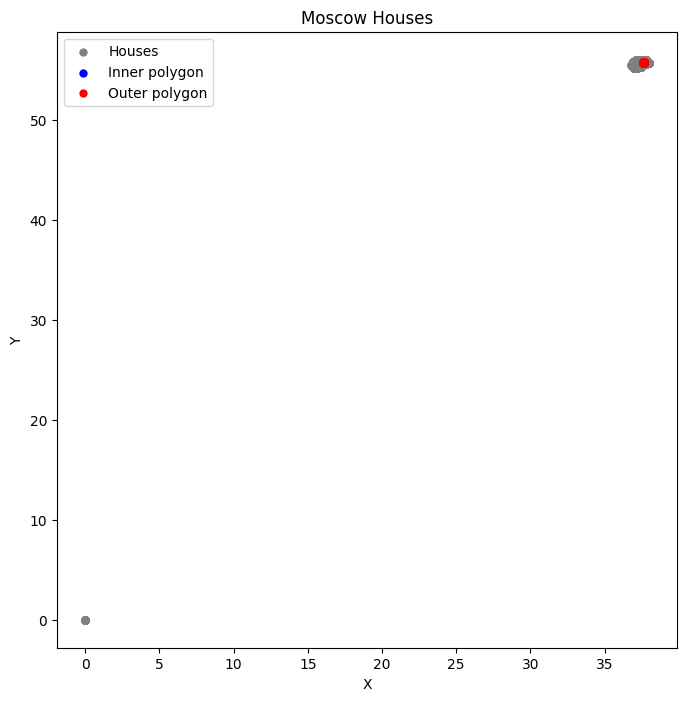

In [38]:
plt.figure(figsize=(8, 8))
plt.title("Moscow Houses")
plt.scatter(house_points[:, 0], house_points[:, 1], linewidths=0.001, c="grey", label="Houses")
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b", label="Inner polygon")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r", label="Outer polygon")
plt.xlabel('X')# MY CODE HERE
plt.ylabel('Y')# MY CODE HERE
plt.legend(loc="upper left")
plt.show()

Ooooops seems a bit wrong. 

**Question**: why does the plot look so strange? How to fix it?

**Your answer:** Because of the chart's scale which is like this because of zero values. So we need to filter those values.

Now fix the `house_points` array, remove a set of points in the bottom left corner:

In [39]:
house_points = house_points[house_points != np.array([0.0, 0.0])].reshape((-1,2))# MY CODE HERE

And scatter it again:

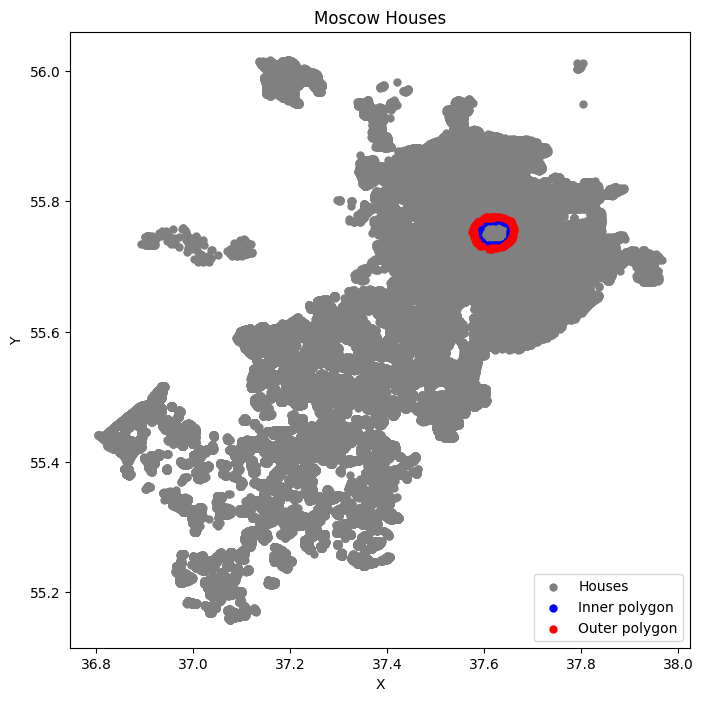

In [40]:
plt.figure(figsize=(8, 8))
plt.title("Moscow Houses")
plt.scatter(house_points[:, 0], house_points[:, 1], linewidths=0.001, c="grey", label="Houses")
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b", label="Inner polygon")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r", label="Outer polygon")
plt.xlabel('X')# MY CODE HERE
plt.ylabel('Y')# MY CODE HERE
plt.legend(loc="lower right")
plt.show()

Let's do a little zoom-in: filter `house_points` and leave points in some **small square** near the garden ring. The choice of the size of the square is up to you, but the outer poly should be inside this square.

I have already defined a small square, but you can change its sizes.

In [41]:
lower_x = 37.56
upper_x = 37.68
lower_y = 55.70
upper_y = 55.80

def filter_points_by_square(input_array, lower_x, upper_x, lower_y, upper_y):
    # MY CODE BELOW
    result = []
    #print(len(input_array))
    for i in range(len(input_array)):
        if lower_x<=input_array[i][0]<=upper_x and lower_y<=input_array[i][1]<=upper_y:
            result.append(input_array[i])
    return np.array(result).reshape((-1,2))


In [42]:
small_square_points = filter_points_by_square(house_points, lower_x, upper_x, lower_y, upper_y)

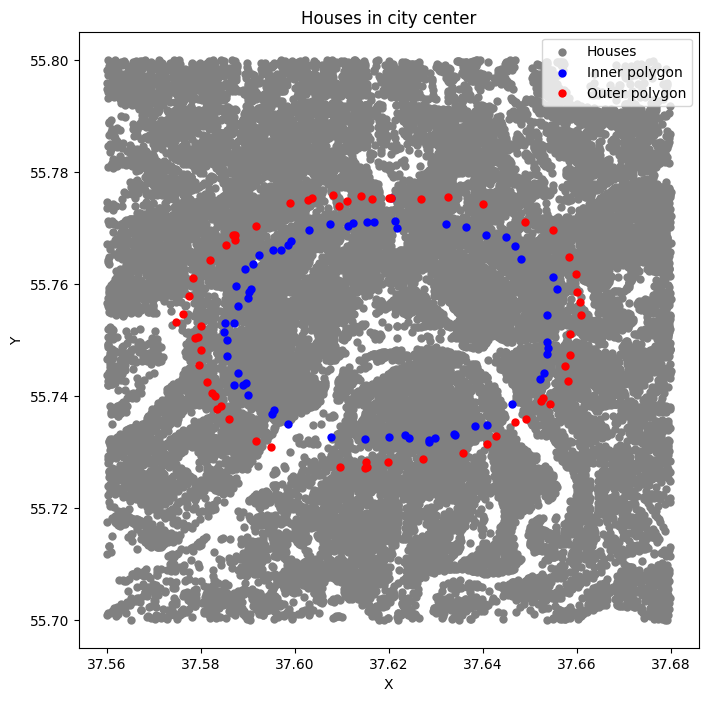

In [43]:
plt.figure(figsize=(8, 8))
plt.title("Houses in city center")
plt.scatter(small_square_points[:, 0], small_square_points[:, 1], linewidths=0.001, c="grey", label="Houses")
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b", label="Inner polygon")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r", label="Outer polygon")
plt.xlabel('X')# MY CODE HERE
plt.ylabel('Y')# MY CODE HERE
plt.legend(loc="upper right")
plt.show()

**Task 4. Houses in a polygon [2 points]**

Implement a function, that by two coordinates of a point and list of coordinates of the polygon tells whether this point is inside a polygon or not.

You may define as many others functions as you want.

*Hint: the polygons may be regarded as convex.*

**Question:** what algorithm to decide whether the point is inside will you implement? Why is it supposed to work?

**Your answer:** I will be using the ray tracing method. It has some flaws but it's good enough to use. It is supposed to work because of it's simplicity and due to the fact that it doesn't matter if the polygon is convex or not.

In [44]:
# MY CODE HERE

In [45]:
def point_is_inside(point, polygon_points):
    """
    input:
    - point np.array of (1, 2) shape
    - polygon_points np.array of (N, 2) shape
    output:
    - bool True if point is inside, false if point is outside
    """
    # MY CODE HERE
    answer = False
    p_x, p_y = point[0], point[1]
    p_tmp_arr = list(polygon_points.copy())
    p_tmp_arr.append(p_tmp_arr[0])
    # ray is co-directional with OX
    for i in range(len(p_tmp_arr)-1):
        x1, y1 = p_tmp_arr[i][0], p_tmp_arr[i][1]
        x2, y2 = p_tmp_arr[i+1][0], p_tmp_arr[i+1][1]
        if not min(y1, y2)<=p_y<=max(y1, y2):
            continue
        elif (p_y-y1)*(x2-x1)/(y2-y1) + x1 >= p_x:
            answer = not answer

    return answer

And the final part! 

Scatter plot `small_square_points` again, but with 3 different colours:
- colour 1: points inside inner poly
- colour 2: points outside outer poly
- colour 3: points between inner and outer polys

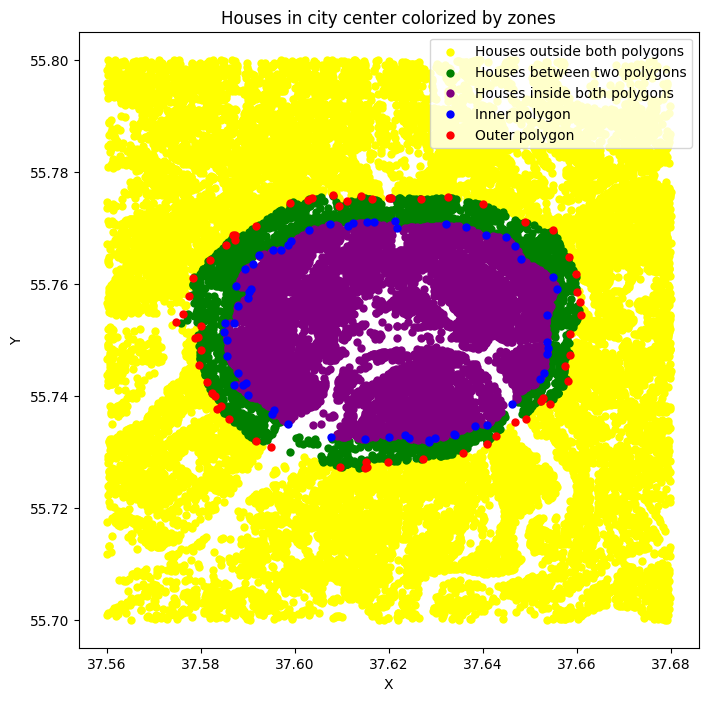

In [46]:
# MY CODE BELOW
plt.figure(figsize=(8, 8))
plt.title("Houses in city center colorized by zones")

inside_inner_poly = []
between_two_poly = []
outside_outer_poly = []

for some_point in small_square_points:
    if point_is_inside(some_point, inner_poly):
        inside_inner_poly.append(some_point)
    elif point_is_inside(some_point, outer_poly):
        between_two_poly.append(some_point)
    else:
        outside_outer_poly.append(some_point)

inside_inner_poly = np.array(inside_inner_poly).reshape((-1,2))
between_two_poly = np.array(between_two_poly).reshape((-1,2))
outside_outer_poly = np.array(outside_outer_poly).reshape((-1,2))

plt.scatter(outside_outer_poly[:, 0], outside_outer_poly[:, 1], linewidths=0.001,
            c="yellow", label="Houses outside both polygons")
plt.scatter(between_two_poly[:, 0], between_two_poly[:, 1], linewidths=0.001,
            c="green", label="Houses between two polygons")
plt.scatter(inside_inner_poly[:, 0], inside_inner_poly[:, 1], linewidths=0.001,
            c="purple", label="Houses inside both polygons")

plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b", label="Inner polygon")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r", label="Outer polygon")
#plt.scatter(small_square_points[:, 0], small_square_points[:, 1], linewidths=0.001, c="grey")
plt.xlabel('X')# MY CODE HERE
plt.ylabel('Y')# MY CODE HERE
plt.legend(loc="upper right")
plt.show()

**Question:** How many points are there between inner and outer polys?

**Your answer:** 2952 points, as you can see below (length of list `between_two_poly`)

In [47]:
print(len(between_two_poly))

2952


# Part 3. Titanic Dataset - Stats and Plots [8 points]


In this part we are going to analyze the "Titanic dataset".
The main goal of this task is to describe the data.

Here are some tips:
- use plots
- notice pecualrities in the data
- present verbal explanations, don't be too shy

**Important** Please pay attention to your plots: titles, axis-labels and legends are necessary.

These  tasks involve `numpy`, `pandas` and `matplotlib` - very common python modules. In one task you may use `scipy`.

#### Input data
This task uses 2 files:
- `passengers_record.csv` contains some general information on passengers (name, class, age, etc.)
- `survival_info.csv` contains binary labels whether passenger survived or not

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Task 1. [1 point]**

Read these files and join them into single dataset (use `passenger_id` as join key). Then provide some description of the dataset: 
- What are age/gender/class distributions and their averages? How many people belong to each group?
- Find the oldest/youngest passangers in every class
- Compare survival rates between classes/age groups/genders (configuration of age groups is up to you)

In [126]:
passengers_record = pd.read_csv("data/passengers_record.csv")# MY CODE HERE
survival_info = pd.read_csv("data/survival_info.csv")# MY CODE HERE

assert passengers_record.shape == (891, 11) and survival_info.shape == (891, 2), "Wrong db shapes"

The following charts present the number of people in each group:


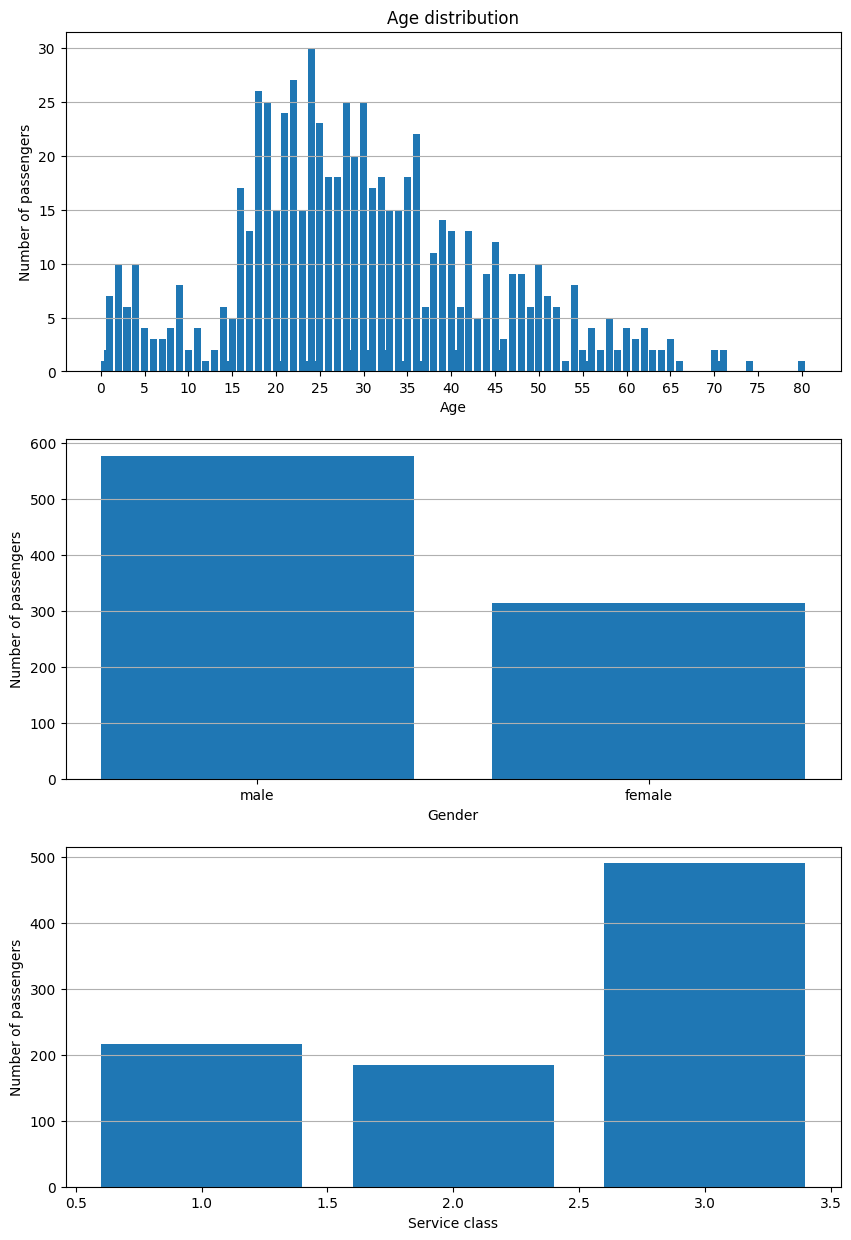

Average values for:
Age - 30
Gender - male
Class - 3
Although term 'average' is not suitable for 'Gender' and 'Class' so I presented most frequent values.


In [153]:
# MY CODE BELOW
db = pd.merge(passengers_record, survival_info, on='PassengerId')
# print(db.describe([.1, .2, .3, .4, .5, .6, .7, .8, .9]))
# age/gender/class distributions and their averages; How many people belong to each group
print('The following charts present the number of people in each group:')
fig, (age_plt, sex_plt, class_plt) = plt.subplots(3, 1, figsize=(10,15))

age_plt.bar(x=db['Age'].value_counts().index, height=db['Age'].value_counts().values)
age_plt.set_xticks([i for i in range(0,85,5)])  # I want 5-year xticks
age_plt.set_title('Age distribution')
age_plt.set_xlabel('Age')
age_plt.set_ylabel('Number of passengers')
age_plt.grid(axis='y')

class_plt.bar(x=db['Pclass'].value_counts().index, height=db['Pclass'].value_counts().values)
class_plt.set_label('Service class distribution')
class_plt.set_xlabel('Service class')
class_plt.set_ylabel('Number of passengers')
class_plt.grid(axis='y')

sex_plt.bar(x=db['Sex'].value_counts().index, height=db['Sex'].value_counts().values)
sex_plt.set_label('Gender distributions')
sex_plt.set_xlabel('Gender')
sex_plt.set_ylabel('Number of passengers')
sex_plt.grid(axis='y')

plt.show()

print('Average values for:\nAge - {}\nGender - {}\nClass - {}'.format(
    round(db.describe()['Age']['mean']), db['Sex'].describe()['top'],
    db['Pclass'].apply(lambda x: str(x)).describe()['top']) )
print("Although term 'average' is not suitable for 'Gender' and 'Class' so I presented most frequent values.")

In [171]:
# the oldest/youngest passengers in every class
pclass_age_db = db.pivot(columns='Pclass', values='Age')
print(pd.DataFrame(data={'Youngest': pclass_age_db.min(),
                         'Oldest': pclass_age_db.max()}))

        Youngest  Oldest
Pclass                  
1           0.92    80.0
2           0.67    70.0
3           0.42    74.0


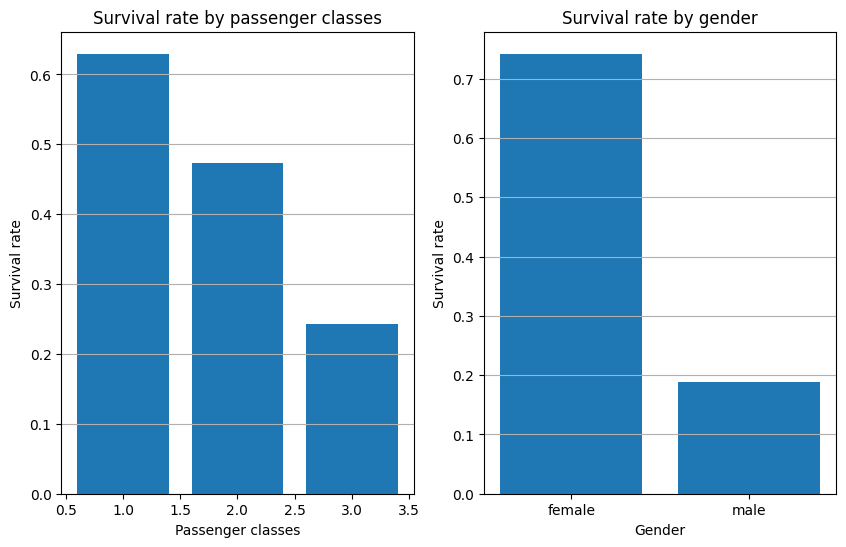

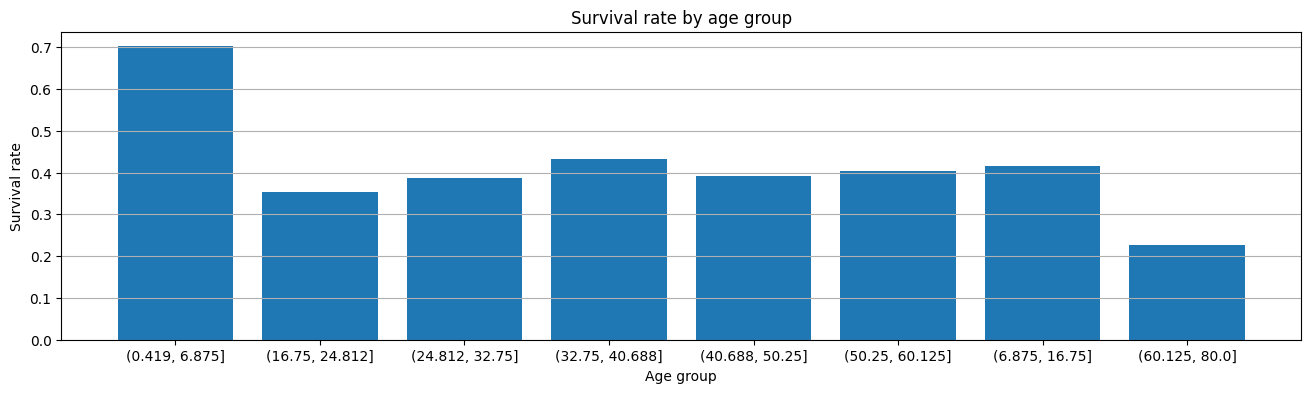

In [312]:
#survival rates between classes/age groups/genders
fig, axes = plt.subplots(1,2, figsize=(10,6))
count_plt = 0
survival_rate_names = ['Passenger classes', 'Gender']
for item in ['Pclass', 'Sex']:
    tmp_db = db.pivot(columns=item, values='Survived')
    tmp_db = pd.DataFrame(data={'Survival rate': tmp_db.sum()/tmp_db.count()})
    axes[count_plt].bar(x=list(tmp_db.index), height=tmp_db.values.flatten())
    axes[count_plt].set_title('Survival rate per '+survival_rate_names[count_plt].lower())
    axes[count_plt].set_xlabel(survival_rate_names[count_plt])
    axes[count_plt].set_ylabel('Survival rate')
    axes[count_plt].grid(axis='y')
    count_plt += 1

plt.show()

tmp_db = db.pivot(columns='Age', values='Survived')
def foo_func(x, categ=pd.qcut(tmp_db.columns, 8).categories):
    if x is np.nan:
        return 'missing value'
    else:
        for i in categ:
            if x in i:
                return str(i)
    return 'missing value'
db['Age group'] = db['Age'].apply(foo_func)
tmp_db = db.pivot(columns='Age group', values='Survived')
tmp_db = pd.DataFrame(data={'Survival rate': tmp_db.sum()/tmp_db.count()}).drop('missing value')

plt.figure(figsize=(16,4))
plt.bar(x=list(tmp_db.index), height=tmp_db.values.flatten())
plt.title('Survival rate per age group')
plt.xlabel('Age group')
plt.ylabel('Survival rate')
plt.grid(axis='y')
plt.show()


**Task 2. [2 points]**

Compare average age per class: can we consider these values to be equal? Use visualisation to prove your point. 

Can we answer this question using the T-test? Why? Here you may use `scipy.stats`.

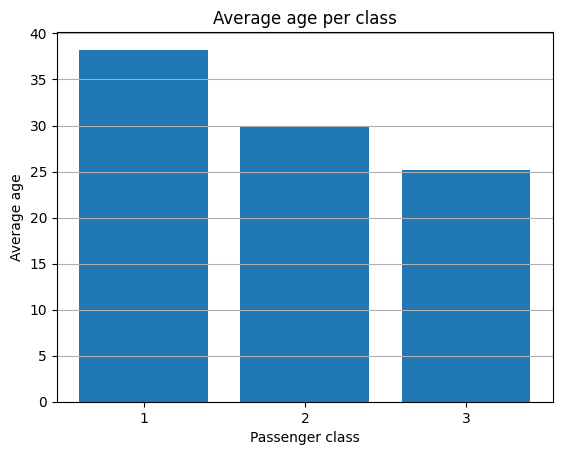

In [313]:
age_per_class = db.groupby('Pclass').mean('Age')['Age']
vl_cnt = list(db.groupby('Pclass').count()['PassengerId'])
plt.title('Average age per class')
plt.bar(x=age_per_class.index, height=age_per_class)
plt.xticks(age_per_class.index)
plt.xlabel('Passenger class')
plt.ylabel('Average age')
plt.grid(axis='y')
plt.show()

In [336]:
import scipy
scipy.stats.chisquare(vl_cnt)

Power_divergenceResult(statistic=191.8047138047138, pvalue=2.2394202231028854e-42)

**Answer:** As you can see, we cannot consider these values equal. Also as p-value in Pearson's criteria is close to zero we can't use T-test.

**Task 3. [2 points]**

Use `plt.subplots` to create side-by-side histograms of distributions:
- columns: 3 classes
- rows: age, fare, sex, survival rate

The output is 4 by 3 table of plots.

**This one is broken and I had no time to fix it; Sorry; You can skip this task**

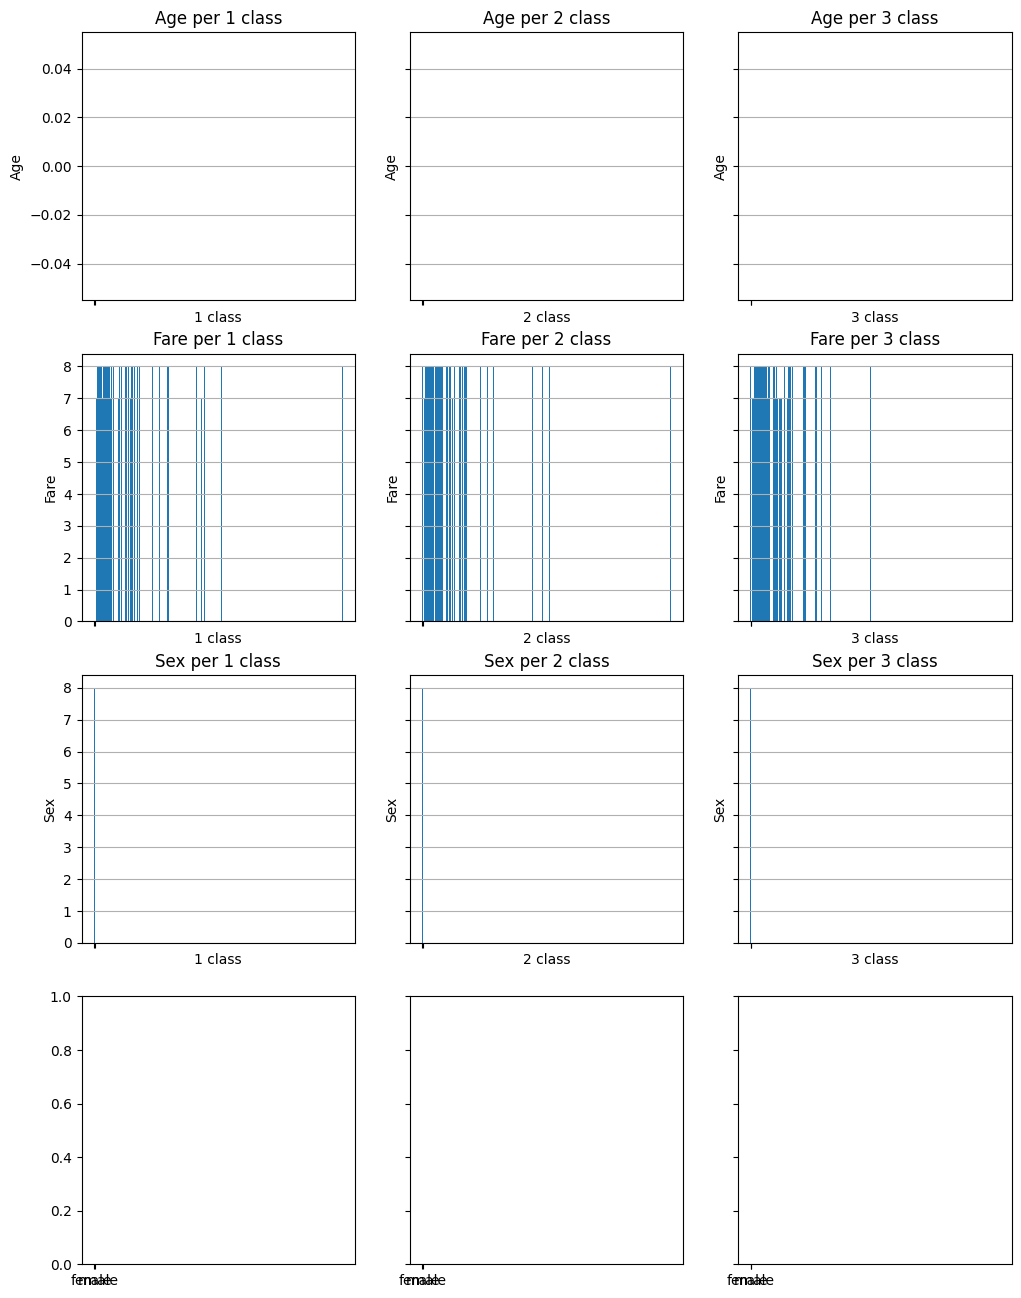

In [370]:
# MY CODE BELOW
fig, axes = plt.subplots(4, 3, figsize=(12, 16), sharex='col', sharey='row')
row_names = ['Age', 'Fare', 'Sex']
col_names = np.unique(db['Pclass'])
for i in range(3):
    for j in range(3):
        tmp_db = db.pivot(columns=row_names[i], values='Pclass')
        #print(tmp_db.describe())
        axes[i][j].bar(x=list(tmp_db.describe().columns), height=list(tmp_db.describe().count()))
        axes[i][j].set_title(row_names[i]+' per '+str(col_names[j])+' class')
        axes[i][j].set_xlabel(str(col_names[j])+' class')
        axes[i][j].set_ylabel(row_names[i])
        axes[i][j].grid(axis='y')

plt.show()

**Task 4. [1 point]**

Find 5 most common **surnames** in passenger list. Try to use `pandas.Series.apply` and lambda-function to extract surnames.

In [371]:
# MY CODE BELOW
surnames_dict = {}
for surname in db['Name'].apply(lambda x: x.split(',')[0]):
    surnames_dict[surname] = 1 if surname not in surnames_dict else surnames_dict[surname] + 1
print('Top 5 most frequent surnames are:')
print(sorted(surnames_dict, key=surnames_dict.get, reverse=True)[:5])

Top 5 most frequent surnames are:
['Andersson', 'Sage', 'Johnson', 'Panula', 'Goodwin']


**Task 5. [2 points]**

Probably you already have noticed that there are missing values in the dataset. We will try to fix that.
1. Omit all the rows, that contain missing values. Is the result plausible? How does this method effect amount of data and values from Task 1 (age histograms, survival rates, etc.?)
2. Suggest some better options to handle missing values in the data and check if it distorts the statistics.

**No comment** (unfortunately)

### Great! Don't forget to submit before the deadline :)